In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, ConfusionMatrixDisplay

In [3]:
water_quality = pd.read_csv('water_potability.csv')

In [5]:
water_quality.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [6]:
water_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [9]:
water_quality.isnull()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
3271,False,False,False,False,False,False,False,False,False,False
3272,False,False,False,False,True,False,False,True,False,False
3273,False,False,False,False,True,False,False,False,False,False
3274,False,False,False,False,True,False,False,False,False,False


In [10]:
water_quality.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [21]:
missing_val_coll = ["ph", "Sulfate","Trihalomethanes"]

In [22]:
for col in missing_val_coll:
    if water_quality[col].isnull().any():
        mean = water_quality[col].mean()
        water_quality[col].fillna(mean, inplace=True)

In [23]:
water_quality.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [24]:
wq = water_quality

In [29]:
wq['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

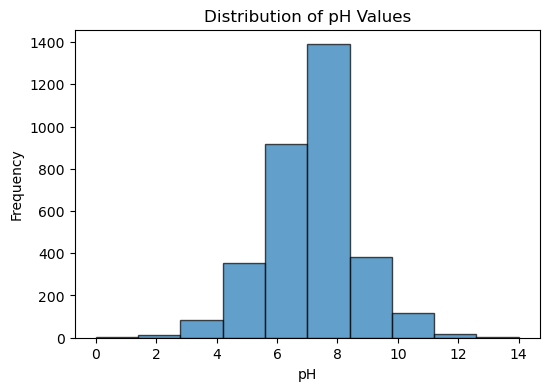

In [53]:
ph_values = wq['ph']
potability_labels = wq['Potability']

plt.figure(figsize=(6, 4))
plt.hist(ph_values, bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribution of pH Values')
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.show()

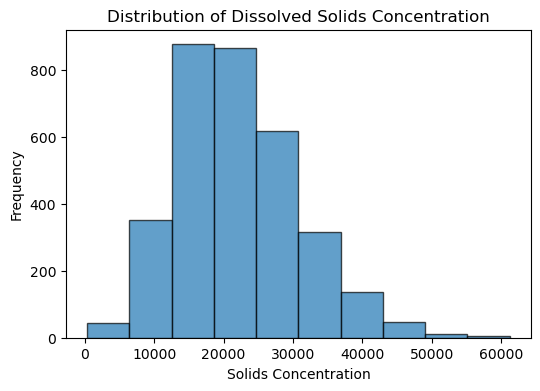

In [52]:
solids_values = wq['Solids']
potability_labels = wq['Potability']

plt.figure(figsize=(6, 4))
plt.hist(solids_values, bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribution of Dissolved Solids Concentration')
plt.xlabel('Solids Concentration')
plt.ylabel('Frequency')
plt.show()

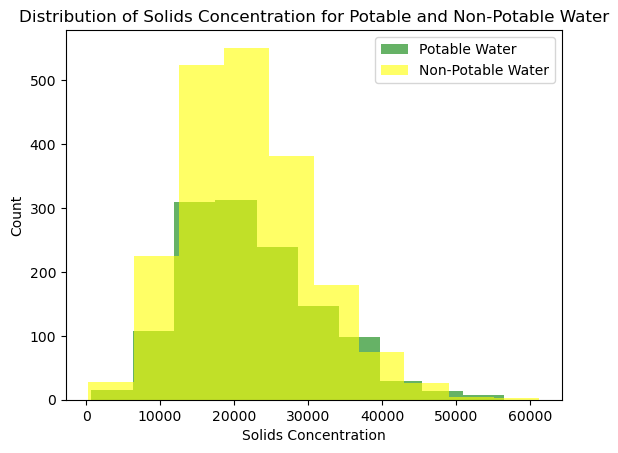

In [64]:
potable_filter = wq['Potability'] == 1
non_potable_filter = wq['Potability'] == 0

# Създаване на хистограма за концентрацията на разтворени твърди вещества
plt.hist(wq[potable_filter]['Solids'], alpha=0.6, color='green')
plt.hist(wq[non_potable_filter]['Solids'], alpha=0.6, color='yellow')

plt.xlabel('Solids Concentration')
plt.ylabel('Count')
plt.title('Distribution of Solids Concentration for Potable and Non-Potable Water')

plt.legend(['Potable Water', 'Non-Potable Water'])

plt.show()

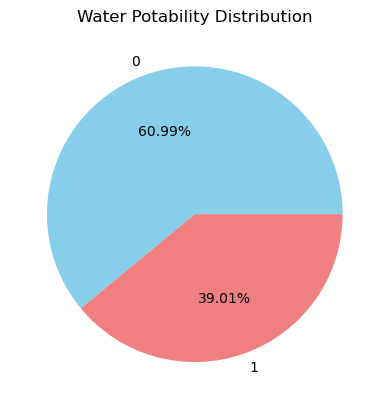

In [65]:
# Групиране на данните по "питаема" и "непитаема" вода
water_type_counts = wq.groupby('Potability').size()

# Създаване на диаграма на торта
plt.gca().set_aspect("equal")
plt.pie(water_type_counts, labels=water_type_counts.index, autopct="%.2f%%", colors=['skyblue', 'lightcoral'])
plt.title("Water Potability Distribution")
plt.show()


Разпределение на водата:

Анализирайки набора от данни, се забелязва, че приблизително 61% са класифицирани като "непитаема вода" (0), докато по-малка част (приблизително 39%) са определени като "питаема вода" (1).

Баланс между класовете:

Разпределението между "непитаема вода" и "питаема вода" не е равномерно, като се наблюдава по-голям брой, класифицирани като "непитаема вода". 

In [67]:
wq.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075833,-0.081884,-0.031811,0.014403,0.017192,0.040061,0.002994,-0.036222,-0.003287
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449,-0.013837
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546,0.033743
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.016627,0.002363,0.023779
Sulfate,0.014403,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.025605,-0.009790,-0.020619
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.001255,0.005798,-0.008128
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.012976,-0.027308,-0.030001
Trihalomethanes,0.002994,-0.012690,-0.008875,0.016627,-0.025605,0.001255,-0.012976,1.000000,-0.021502,0.006960
Turbidity,-0.036222,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.021502,1.000000,0.001581
Potability,-0.003287,-0.013837,0.033743,0.023779,-0.020619,-0.008128,-0.030001,0.006960,0.001581,1.000000


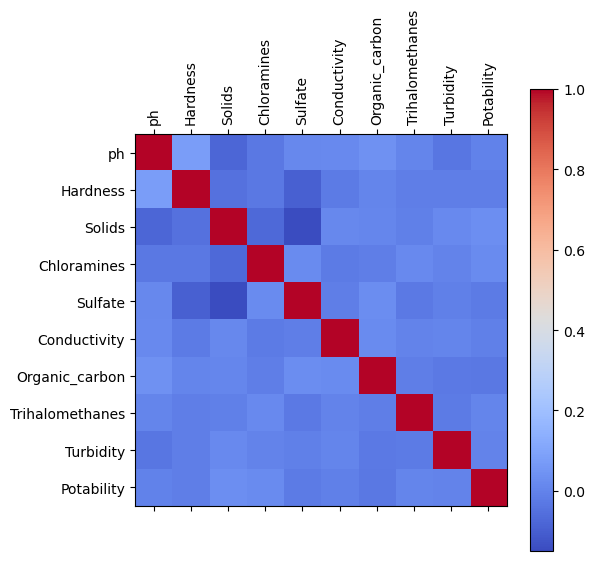

In [73]:
def plot_corr(dataframe, size=6):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        dataframe: pandas DataFrame
        size: vertical and horizontal size of the plot
    """

    corr = dataframe.corr()

    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(corr, cmap='coolwarm')  # Заменете 'coolwarm' с предпочитания от вас цветове
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    
    # Добавяне на цветната легенда
    plt.colorbar(cax)

# Извикване на функцията с вашия DataFrame
plot_corr(wq)
plt.show()

In [75]:
corr = wq.corr()
corr.style.background_gradient(cmap='coolwarm')

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075833,-0.081884,-0.031811,0.014403,0.017192,0.040061,0.002994,-0.036222,-0.003287
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449,-0.013837
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546,0.033743
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.016627,0.002363,0.023779
Sulfate,0.014403,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.025605,-0.009790,-0.020619
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.001255,0.005798,-0.008128
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.012976,-0.027308,-0.030001
Trihalomethanes,0.002994,-0.012690,-0.008875,0.016627,-0.025605,0.001255,-0.012976,1.000000,-0.021502,0.006960
Turbidity,-0.036222,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.021502,1.000000,0.001581
Potability,-0.003287,-0.013837,0.033743,0.023779,-0.020619,-0.008128,-0.030001,0.006960,0.001581,1.000000


In [78]:
# Изчислете корелациите
correlations = wq.corr()

# Намерете индексите на силно корелираните колони
highly_correlated = set()
for i in range(len(correlations.columns)):
    for j in range(i):
        if abs(correlations.iloc[i, j]) > 0.8:
            colname = correlations.columns[i]
            highly_correlated.add(colname)

# Премахнете силно корелираните колони от DataFrame
wq_filtered = wq.drop(columns=highly_correlated)

In [80]:
wq_filtered.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [81]:
wq_filtered['Potability'].unique()

array([0, 1], dtype=int64)

In [82]:
wq_filtered.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [90]:
good_potability = wq['Potability'].mean()
print(good_potability)

0.3901098901098901


In [91]:
Y = wq['Potability'].apply(lambda y: 1 if y>good_potability else 0)

In [93]:
scaler = StandardScaler()
scaler.fit(X)
X_standard = scaler.transform(X)

NameError: name 'X' is not defined